In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import csv
import pickle
from vista_utils_ARM import *
from tqdm import tqdm #progress bar for visualization of progress



In [134]:
def encode_value(x):
    """
    Encode the values in the list to a string representation.
    """
 
    if x==-1:
        return '0xffff'
    elif x==-2:
        return '0xfffe'
    else:
        return str(hex(x))

def HW(x):
    return sum([x&(1<<i)>0 for i in range(32)])
def concat_hex(a, b):
    """
    Concatenate two integers (given in hex or int) and return the result as a hex string.
   
    """
    if isinstance(a, str):
        a = int(a, 16)
    if isinstance(b, str):
        b = int(b, 16)
   
    b_hex = format(b, '04x')
    a_hex = format(a, 'x')
    # print(b_hex)
    concatenated =  a_hex+b_hex 
    if concatenated == '00000':
        return '0x0'
    elif concatenated == '00001':
        return '0x1'
    elif concatenated == '00002':
        return '0x2'
    elif concatenated == '0ffff':
        return '0xffff'
    elif concatenated == '0ffff0000':
        return '0xffff'
    elif concatenated == '0fffe':
        return '0xfffe'
    return '0x' + concatenated

def generate_noise(var,number_elements):
    return np.random.normal(0,var,number_elements)

In [135]:
traces_NTT=np.load('simulated_traces/polyvec_ntt_HD.npy')



In [136]:
var_low=0.001
NUMBER_SAMPLES=12578-1
noise=generate_noise(var_low,NUMBER_SAMPLES)
print(noise.shape)
trace_std=np.std(traces_NTT, axis=0)+noise
trace_mean=np.mean(traces_NTT, axis=0)+noise

(12577,)


## Read data
 this notebook can be used to search for constants between a defined index range

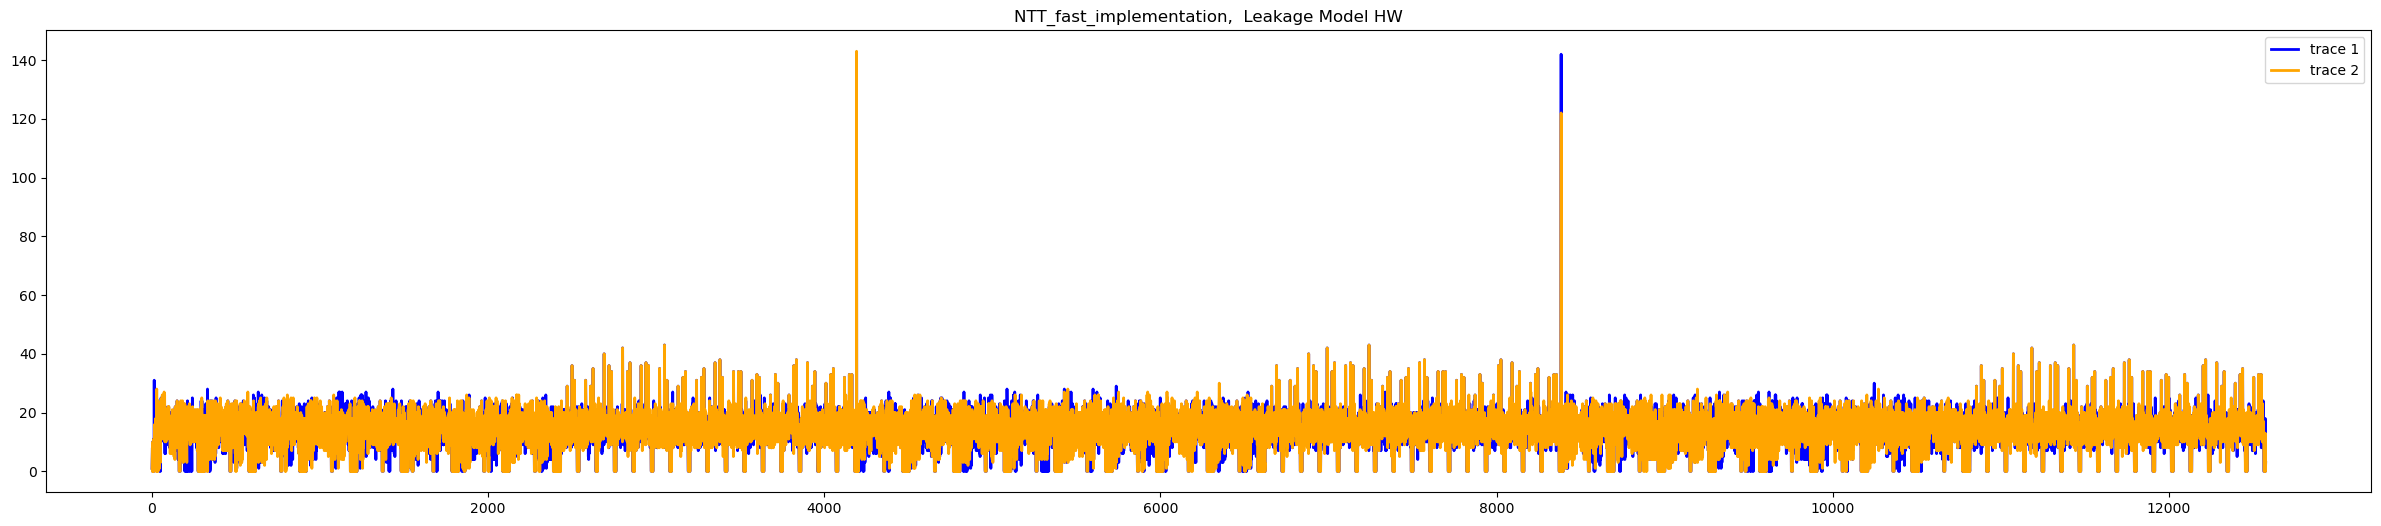

In [137]:
f = plt.figure(figsize=(30,6))
font = {'weight': 'normal','size': 18}
plt.plot(traces_NTT[0], color='blue', linestyle='solid',lw=2,label = 'trace 1')
plt.plot(traces_NTT[1], color='orange', linestyle='solid',lw=2,label = 'trace 2')
plt.legend()
plt.title('NTT_fast_implementation,  Leakage Model HW')
#plt.savefig("kem_enc.pdf", dpi=300)
plt.show()

In [138]:
path_poly_coeff='intermediate_values/poly_coeff/'
NUMBER_OF_TRACES=250
#extract from saved files the polynomial coefficients


def compute_correlation(traces, target_variable):
    corr=[]
    for i in range(0,NUMBER_SAMPLES-1):
        corr.append(np.corrcoef(traces[:,i],target_variable)[1,0])
        
    return corr
def extract_and_process_coefficients(path, NUMBER_OF_TRACES, C1, C2):
    data_to_correlate= []    
    coeff_list_1=[]
    coeff_list_2=[] # 
    for i in range(NUMBER_OF_TRACES):
        filename=path_poly_coeff +'trace_'+str(i)+'_ntt_7_arg.txt'
        with open( filename, 'r') as f:
            #print('Trace', i)
            my_list = f.read().strip()
            my_list = my_list.strip("[]")
            my_integers = [int(x.strip()) for x in my_list.split(",")]
            temp=int(concat_hex(encode_value(my_integers[C2]), encode_value(my_integers[C1])),16)
            data_to_correlate.append(temp)

    return data_to_correlate



In [139]:

def coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, C1, C2):
    coeff=extract_and_process_coefficients(path_poly_coeff, NUMBER_OF_TRACES, C1, C2)
    coeff_HW=[HW(x) for x in coeff]
    corr_traces_HW=compute_correlation(traces_NTT, coeff_HW)
    corr_traces=compute_correlation(traces_NTT, coeff)
    return corr_traces, corr_traces_HW
_, corr_16_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 16, 17)
_, corr_48_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 48, 49)
_, corr_80_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 80, 81)
_, corr_traces_112_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 112, 113)
_, corr_traces_144_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 144, 145)
_, corr_traces_176_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 176, 177)
_, corr_traces_208_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 208, 209)
_, corr_traces_240_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 240, 241)


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [140]:
_, corr_30_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 16+14, 17+14)
_, corr_62_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 48+14, 49+14)
_, corr_94_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 80+14, 81+14)
_, corr_traces_126_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 112+14, 127)
_, corr_traces_158_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 144+14, 145+14)
_, corr_traces_190_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 176+14, 177+14)
_, corr_traces_222_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 208+14, 209+14)
_, corr_traces_254_HW = coeff_correlation_analysis(path_poly_coeff, traces_NTT, NUMBER_OF_TRACES, 240+14, 241+14)

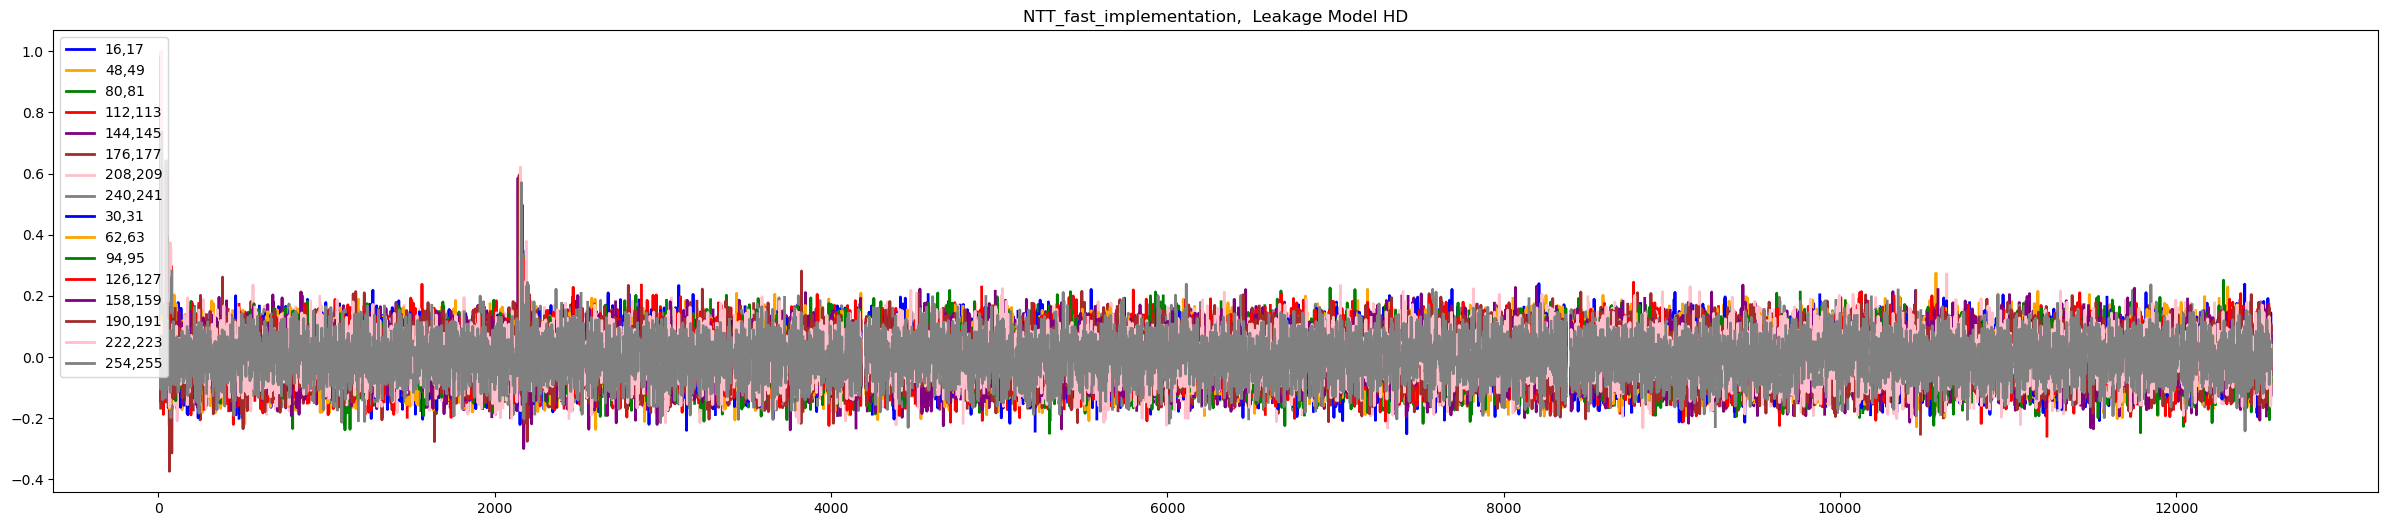

In [147]:
start=0
end=len(trace_mean)
f = plt.figure(figsize=(30,6))
font = {'weight': 'normal','size': 18}
plt.plot(corr_16_HW[start:end], color='blue', linestyle='solid',lw=2,label = '16,17')
plt.plot(corr_48_HW[start:end], color='orange', linestyle='solid',lw=2,label = '48,49')
plt.plot(corr_80_HW[start:end], color='green', linestyle='solid',lw=2,label = '80,81')
plt.plot(corr_traces_112_HW[start:end], color='red', linestyle='solid',lw=2,label = '112,113')
plt.plot(corr_traces_144_HW[start:end], color='purple', linestyle='solid',lw=2,label = '144,145')
plt.plot(corr_traces_176_HW[start:end], color='brown', linestyle='solid',lw=2,label = '176,177')
plt.plot(corr_traces_208_HW[start:end], color='pink', linestyle='solid',lw=2,label = '208,209')
plt.plot(corr_traces_240_HW[start:end], color='gray', linestyle='solid',lw=2,label = '240,241')
plt.plot(corr_30_HW[start:end], color='blue', linestyle='solid',lw=2,label = '30,31')
plt.plot(corr_62_HW[start:end], color='orange', linestyle='solid',lw=2,label = '62,63')
plt.plot(corr_94_HW[start:end], color='green', linestyle='solid',lw=2,label = '94,95')
plt.plot(corr_traces_126_HW[start:end], color='red', linestyle='solid',lw=2,label = '126,127')
plt.plot(corr_traces_158_HW[start:end], color='purple', linestyle='solid',lw=2,label = '158,159')
plt.plot(corr_traces_190_HW[start:end], color='brown', linestyle='solid',lw=2,label = '190,191')
plt.plot(corr_traces_222_HW[start:end], color='pink', linestyle='solid',lw=2,label = '222,223')
plt.plot(corr_traces_254_HW[start:end], color='gray', linestyle='solid',lw=2,label = '254,255')
plt.legend()
plt.title('NTT_fast_implementation,  Leakage Model HD')
#plt.savefig("kem_enc.pdf", dpi=300)
plt.show()

In [142]:
def find_index(lst, item):
    """
    Returns the index of the first occurrence of `item` in `lst`.
    Raises ValueError if the item is not found.
    """
    return [i for i, x in enumerate(lst) if x == item]
def print_code(df, index_1, count, registers=['PC','Ins','r0','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11','r12','sp','lr']):
    """
    select the rows between index_1 and index_2 from the 'filename' and print the PC, instruction and operands
    example usage:
        print_code(filename, 5000, 5010)
    """
    indices=range(index_1,index_1+count)
    #selected_rows = df.iloc[indices][['PC','Ins','Operands','r0','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11','r12','sp','lr']]
    selected_rows = df.iloc[indices][registers]
    
    print(selected_rows)

In [143]:

#[print(hex(x)) for x in coeff_16_17[0:10]]


In [144]:
trace_number=0
df_trace=pd.read_csv('execution_traces//polyvec_ntt_250/trace_'+str(trace_number)+'.csv')

PC='0x80056e8'
index_PC=find_index(df_trace['PC'], PC)
print(hex(coeff[trace_number]))
print_code(df_trace, index_PC[0], 5,registers=['PC','Ins','Operands','r2','r3'])
print(df_trace['r2'][index_PC[0]+1]) #16,17
print(df_trace['r3'][index_PC[0]+2]) #48,49

0x20002
           PC    Ins          Operands          r2          r3
13  0x80056e8  ldr.w   r2, [r0, #0x20]  0xffffffff  0x2001a680
14  0x80056ec  ldr.w   r3, [r0, #0x60]     0x10000  0x2001a680
15  0x80056f0  ldr.w   r4, [r0, #0xa0]     0x10000     0x20002
16  0x80056f4  ldr.w   r5, [r0, #0xe0]     0x10000     0x20002
17  0x80056f8  ldr.w  r6, [r0, #0x120]     0x10000     0x20002
0x10000
0x20002


In [145]:
real_coeff=[]
PC='0x80056e8'
index_PC=find_index(df_trace['PC'], PC)
for i in range(NUMBER_OF_TRACES):
    df_trace=pd.read_csv('execution_traces//polyvec_ntt_250/trace_'+str(i)+'.csv')
    real_coeff.append(df_trace['r3'][index_PC[0]+2])

In [146]:
print(len(real_coeff))

for i in range(len(real_coeff)):
    if str(real_coeff[i])!=str(hex(coeff[i])):
        print('Mismatch at trace', i, 'real:', real_coeff[i], 'computed:', hex(coeff[i]))
  

250
